# Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Decomposition
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

## Loading test data (WINE)

In [4]:
path = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_wine_clustering/wine-clustering.csv'
data = pd.read_csv(path)

In [5]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Clustering

The two kinds of clustering that are going to be presented here are:

- Partitional: the sets of observations are disjoint.
- Hierarchical: creates a relation within the cluster and its subclusters

In this case the method to be presented is the K-Means and it comes from a family <br>
of methods that creates clusters that does not overlap.

The K-Means strategy follows these steps:

1. Select K initial centroids;
2. Repeat until convergence:
    1. Create K clusters and assign each observation to the nearest centroid
    2. Update the centroid

KMeans Limitations:
- Outliers
- Clusters that are not globular;
- Clusters with very different sizes;
- Clusters with very different densities;


Convergence criteria:
- No significant change to the centroids;
- Reaching maximum number of iterations.

More observations about the K-Means algorithm:
- It is more appropriate for continuos data;
- The mean statistics must be a good description of the data;
- The proximity measure needs to deal with continous data, such as euclidean distance <br> 
or cosine dissmilarity
- Tends to converge with a few interations



    

# Testing K-Means

## PCA - for visualization

In [6]:
pca = PCA(n_components=2)

In [7]:
data_pca = pca.fit_transform(data)

<Axes: >

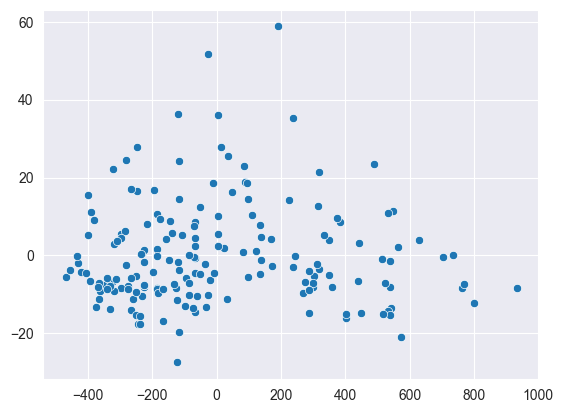

In [8]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1])

## K-Means application

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [10]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [18]:
data['label'] = kmeans.labels_

In [19]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Gettting the Centroids

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids_pca = pca.transform(centroids)

In [13]:
centroids_pca

array([[-225.41068638,   -2.01255715],
       [ 159.59846763,    6.47648456],
       [ 561.90981841,   -4.15062643]])

Showing results

Text(0, 0.5, 'PCA 2')

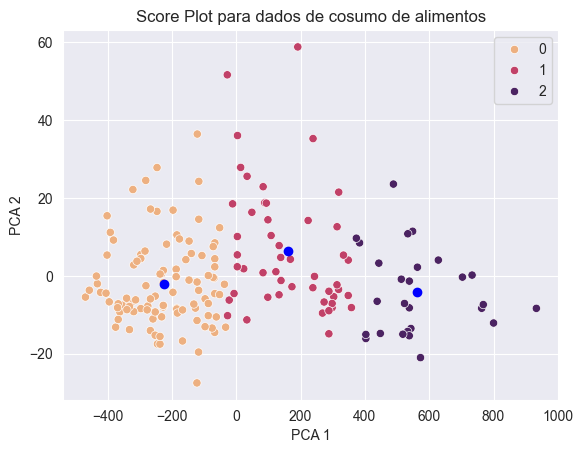

In [72]:
p = sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=kmeans.labels_, palette='flare')
for i in range(3):
    plt.plot(centroids_pca[i][0], centroids_pca[i][1], marker='o', c='blue')


### Clustering evaluation

There are some ways of analyzing if the clustering was efficient or not. Here will<br>
be presented some of them.

1. Visual analysis:
    1. Subjective to the analyst;
    2. Needs to be made in 2D or 3D, and it leads to information loss.
2. Internal validation:
    1. How well the cluster obsercvations were selected
    2. Quadratic Error $QE = \sum\limits_{i=i}^k\sum\limits_{x\in\mathbf{C_i}}d^2(\mu_i, \mathbf{x})$
3. Relative Validation:
    1. Measures both internal and external fit of the clustering;
    2. Silhouette goes from -1 to 1 and the higher the value, the better clustering was made;
    3. $a(i)$ mean distance between every observation within a cluster;
    4. $b(i)$ mean distance between every observation of a cluster with repect to another cluester;
    5. The silhouette formula is: $s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$

#### Calculating Quadratic Error

In [15]:
from sklearn.metrics import mean_squared_error

In [38]:
data[data['label'] == 0].head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,0
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,0
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0


In [63]:
label0 = data[data['label'] == 0].to_numpy()
label1 = data[data['label'] == 1].to_numpy()
label2 = data[data['label'] == 2].to_numpy()

In [64]:
centroid0 = centroids.loc[0].to_numpy() 
centroid1 = centroids.loc[1].to_numpy() 
centroid2 = centroids.loc[2].to_numpy() 

In [66]:
erro_quad0 = np.sum(np.power(label0[:, :-1] - centroid0, 2))
print(f'Quadratic Erro for centroid 0: {erro_quad0:,.2f}')
erro_quad1 = np.sum(np.power(label1[:, :-1] - centroid1, 2))
print(f'Quadratic Erro for centroid 1: {erro_quad1:,.2f}')
erro_quad2 = np.sum(np.power(label2[:, :-1] - centroid2, 2))
print(f'Quadratic Erro for centroid 2: {erro_quad2:,.2f}')

Quadratic Erro for centroid 0: 1,337,414.96
Quadratic Erro for centroid 1: 786,044.81
Quadratic Erro for centroid 2: 510,095.57


#### Calculating Silhouette

In [71]:
silhouette_score(data.iloc[:, :-1], data.iloc[:,-1])

np.float64(0.5595823478987215)